In [1]:
# pytorch computer vision
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

print(torchvision.__version__)

0.15.2+cpu


In [2]:
# getting the data
train_data = datasets.FashionMNIST(root='data',
                                  train=True,
                                  download=True,
                                  transform = ToTensor(),
                                  target_transform = None)
test_data = datasets.FashionMNIST(root='data',train = False,
                                 download=True,
                                 transform = ToTensor(),target_transform = None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
# image.dtype,

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image shape: {image.shape} -> colorchaneels,height , width")

Image shape: torch.Size([1, 28, 28]) -> colorchaneels,height , width


Image shape: torch.Size([1, 28, 28])


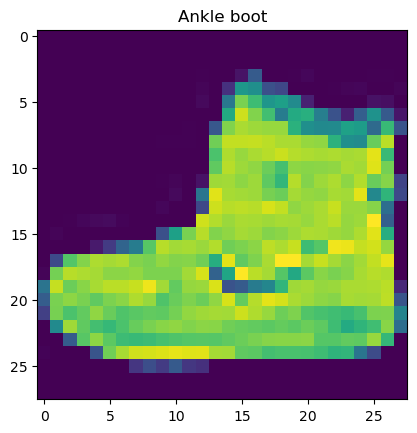

In [9]:
# Visualize the data
import matplotlib.pyplot as plt #matplot lob expect image as (H,W) or (H,W,Channel) but not (channel,H,W)
image, label = train_data[0] # pytorch has (channel,w,h)
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label]);

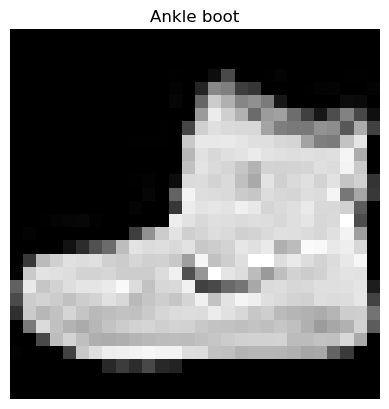

In [10]:
plt.imshow(image.squeeze(),cmap = 'gray')
plt.title(class_names[label]);
plt.axis(False);

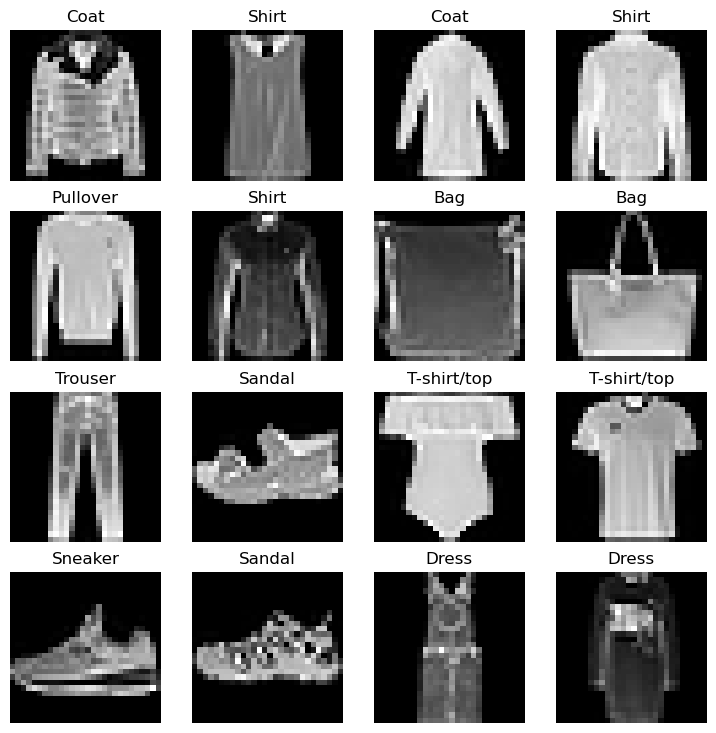

In [11]:
#plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False);

In [12]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [14]:
# prepare dataloader -> turn dataset  into python iterable

In [15]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [16]:
from torch.utils.data import DataLoader

In [17]:
from torch.utils.data import DataLoader

#setup batch size
batch_size = 32

# turn data sets into interables
train_dataloader = DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1c8e74d3a60>,
 <torch.utils.data.dataloader.DataLoader at 0x1c8e74d3fd0>)

In [18]:
# lets checkout dataloader
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batchses of {batch_size} images")
print(f"Length of test data loader:{len(test_dataloader)} batches of {batch_size} images")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001C8E74D3A60>, <torch.utils.data.dataloader.DataLoader object at 0x000001C8E74D3FD0>)
Length of train dataloader: 1875 batchses of 32 images
Length of test data loader:313 batches of 32 images


In [19]:
# check inside training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape:torch.Size([1, 28, 28])
Label: 2


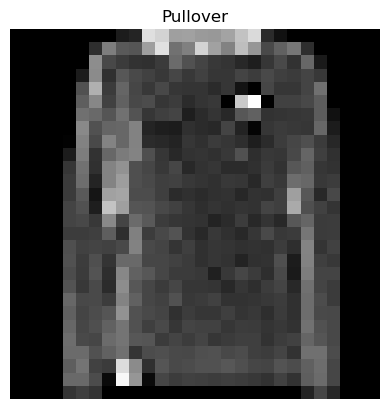

In [20]:
# SHow a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image shape:{img.shape}")
print(f"Label: {label}")

In [21]:
# create baseline model

# create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

# flatten sample
output = flatten_model(x) # performed forward pass

# print
print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [22]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [23]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [24]:
from torch import nn
class FashionModelV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,
                output_shape:int):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
        
    def forward(self, x):
        return self.linear_stack(x)

In [25]:
torch.manual_seed(42)

model_0 = FashionModelV0(input_shape=28*28,hidden_units=10,output_shape=len(class_names)).to("cpu")
model_0

FashionModelV0(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [26]:
# dir(model_0)

In [27]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [28]:
model_0.state_dict()

OrderedDict([('linear_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('linear_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('linear_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

In [29]:
# setup loss function and optimizer
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [30]:
# import accuracy from helper functions
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [31]:
# creating function to time experiments
from timeit import default_timer as timer

def print_train_time(start:float,
                    end:float,
                    device:torch.device = None):
    """Print difference between start and end time"""
    
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [32]:
start_time = timer()
# some code
# print(len(range(100)))
end_time = timer()
print_train_time(start=start_time,end=end_time,device='cpu')

Train time on cpu: 0.000 seconds


5.379999999988172e-05

In [33]:
%%time
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

#create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"EPoch: {epoch}\n----")
    
    # training
    train_loss = 0
    
    # add a loop to loop through traiing batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred,y)
        
        train_loss += loss # acculumate train loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
            
    train_loss /= len(train_dataloader)
    
    # tesing
    test_loss, test_acc = 0,0
    
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            
            test_pred = model_0(X_test)
            
            test_loss += loss_fn(test_pred, y_test)
            
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(test_dataloader)
        
        test_acc /= len(test_dataloader)
        
    print(f"\nTrain loss: {train_loss:.4f} | test loss:{test_loss:.4f} | TEst acc: {test_acc:.4f}")
    

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end = train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))
    
    

  0%|          | 0/3 [00:00<?, ?it/s]

EPoch: 0
----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.5904 | test loss:0.5095 | TEst acc: 82.0387
EPoch: 1
----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4763 | test loss:0.4799 | TEst acc: 83.1969
EPoch: 2
----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4550 | test loss:0.4766 | TEst acc: 83.4265
Train time on cpu: 38.513 seconds
Wall time: 38.6 s


In [34]:
len(train_dataloader.dataset)

60000

In [35]:
#device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [36]:
# make predictions
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
                 data_loader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module,
                 accuracy_fn,
              device=device):
    """Retyrns the dictionary containing the results of model predicting on data_loader."""
    
    loss,acc = 0,0
    
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            #make predictions
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            
            #accumulate loss, acc per batch
            loss +=loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y,
                              y_pred=y_pred.argmax(dim=1))
            
        # scale loss and acc to find average loss / acc per batch
        
        loss /= len(data_loader)
        
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, #only works when model was cretaed with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# calculate model_0 result on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_0_results

{'model_name': 'FashionModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [37]:
#device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [38]:
# Model 1 :Building model with non linearity adding non linear layers 
class FashionModelV1(nn.Module):
    def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(), #flatten inputs into single vector
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=hidden_units),
            nn.ReLU()
        )
        
        
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [39]:
device

'cpu'

In [40]:
# create instance of model_1
torch.manual_seed(42)
model_1 = FashionModelV1(input_shape=784,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)
model_1

FashionModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [41]:
# setup loss, optimzer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [42]:
# functionising training and evaluating loops


def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):
    """Performs a training with model trying to learn on data _loader"""
    
    train_loss, train_acc = 0, 0
    
    model.train()
    
    # add a loop to loop through traiing batches
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        
        #forward pass ,outputs raw logits
        y_pred = model(X)
        
        #calculate loss / acc per batch
        loss = loss_fn(y_pred,y)
        
        train_loss += loss # acculumate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred = y_pred.argmax(dim=1)
                                )
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    
    # divide total train loss and acc by length of train data loader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
    


In [43]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    """Performs a testing loop step on model going over data_loader"""
    
    test_loss, test_acc = 0, 0
    
    #put model on eval mode
    model.eval()
    
    # turn inferecne mode
    with torch.inference_mode():
        for X,y in data_loader:
            # forward pass
            X, y = X.to(device), y.to(device)
            
            test_pred = model(X)
            
            # calculate loss
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,
                                   y_pred=test_pred.argmax(dim=1)) # go from logitsto prediction lbels
            
        # adjust metrics
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")            

In [44]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epocs
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device = device)
    
    test_step(model = model_1,
            data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
-----
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
-----
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Train time on cpu: 49.657 seconds


In [45]:
model_0_results

{'model_name': 'FashionModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [46]:
total_train_time_model_0

38.513191299999995

In [47]:
# get model_1 result dictionary
model_1_results = eval_model(model = model_1,
                        data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,device=device)
model_1_results

{'model_name': 'FashionModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [48]:
model_0_results

{'model_name': 'FashionModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [49]:
# Model 2  buildinga convolutional neural network
# creating a CNN
class FashionModelV2(nn.Module):
    """
    Model Architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
                    nn.Conv2d(in_channels=input_shape,
                         out_channels=hidden_units,
                             kernel_size=3, # (3,3)
                             stride=1,
                             padding=1), # values we set in CNN
                    nn.ReLU(),
                    nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
                    nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             padding=1,
                             stride=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             padding=1,stride=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(in_features=hidden_units*7*7,
                             out_features=output_shape)
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape from conv_block_1:{x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape from conv_block_2:{x.shape}")
        x = self.classifier(x)
        # print(f"Output shape from classifier:{x.shape}")
        return x

In [50]:
torch.manual_seed(42)

model_2 = FashionModelV2(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device) # input shape is number of channels in our image

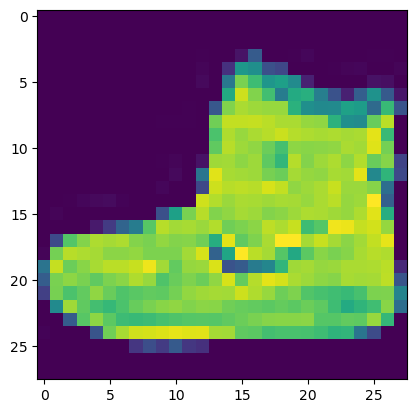

In [51]:
plt.imshow(image.squeeze())

In [52]:
rand_image_tensor = torch.randn(size= (1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [53]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [54]:
# stepping through nn.Conv2D

torch.manual_seed(42)
#create batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape:{images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")
    

Image batch shape:torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [55]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                       kernel_size=3,
                      stride=1,
                      padding=1)

# pass the data theough above conv layer
conv_output= conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [56]:
test_image.shape

torch.Size([3, 64, 64])

In [57]:
# stepping through nn.Max Pool2d layer
test_image.shape

torch.Size([3, 64, 64])

In [58]:
# print original image shape 
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# create a simple nn.Maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data though just conv layer
test_image_thorugh_conv = conv_layer(test_image.unsqueeze(0))
print(f"SHape aftergoing thorugh conv_layer(): {test_image_thorugh_conv.shape}")

#pass data through max pool layer
test_image_through_conv_and_max = max_pool_layer(test_image_thorugh_conv)
print(f"Shape after going through conv llayer() and max pool layer(): {test_image_through_conv_and_max.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
SHape aftergoing thorugh conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv llayer() and max pool layer(): torch.Size([1, 10, 32, 32])


In [59]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# create  max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass random tensor throguh max  pool above
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [60]:
# setup  loss function and optimzer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),lr = 0.1)

In [61]:
# model_2.state_dict()

In [62]:
# train and test using functions
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train /test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(model = model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device = device)
    
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 0.59249 | Train acc: 78.48%
Test loss: 0.39213 | Test acc: 85.75%
Epoch: 1
----
Train loss: 0.36045 | Train acc: 87.10%
Test loss: 0.34834 | Test acc: 87.04%
Epoch: 2
----
Train loss: 0.32190 | Train acc: 88.30%
Test loss: 0.31941 | Test acc: 88.30%
Train time on cpu: 289.644 seconds


In [63]:
# get model2 results
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_2_results

{'model_name': 'FashionModelV2',
 'model_loss': 0.3194074332714081,
 'model_acc': 88.29872204472844}

In [64]:
model_0_results

{'model_name': 'FashionModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [65]:
# comparing the model results
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionModelV0,0.476639,83.426518
1,FashionModelV1,0.685001,75.019968
2,FashionModelV2,0.319407,88.298722


In [66]:
# adding training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionModelV0,0.476639,83.426518,38.513191
1,FashionModelV1,0.685001,75.019968,49.656576
2,FashionModelV2,0.319407,88.298722,289.644053


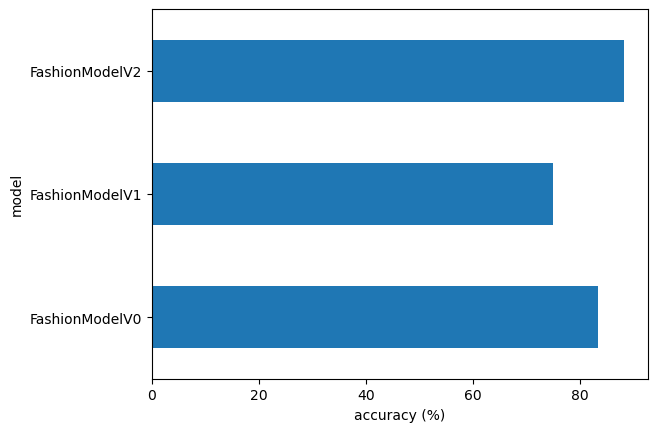

In [67]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind = 'barh')
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [68]:
# amke and evaluate random predictions with best model
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension and pass to device)
            sample = torch.unsqueeze(sample,dim=0).to(device)
            
            # forward pass logits
            pred_logit = model(sample)
            
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            
            # get pred_prob off the gpu
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [69]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),k = 9):
    test_samples.append(sample)
    test_labels.append(label)
    
# view first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

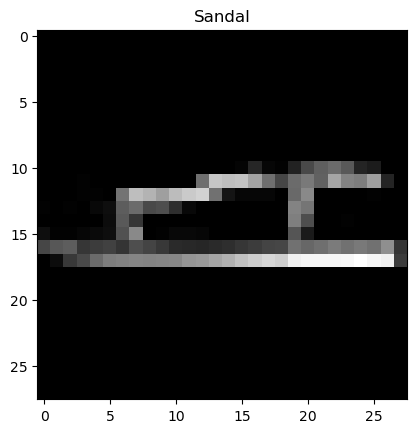

In [70]:
plt.imshow(test_samples[0].squeeze(),cmap = 'gray')
plt.title(class_names[test_labels[0]])

In [71]:
# make predictions
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

# view first predictions
pred_probs[:2]

tensor([[3.8137e-06, 2.6796e-07, 1.3714e-05, 3.5427e-05, 1.0686e-05, 9.9805e-01,
         1.9950e-06, 2.4856e-04, 1.6260e-03, 4.7942e-06],
        [1.9886e-03, 5.7295e-05, 9.5471e-01, 9.8448e-05, 2.7134e-02, 5.7033e-05,
         1.5869e-02, 2.0880e-05, 3.8657e-05, 2.4269e-05]])

In [72]:
# converting probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 2, 0, 4, 5, 5, 4, 1, 5])

In [73]:
test_labels

[5, 2, 0, 8, 5, 5, 4, 1, 5]

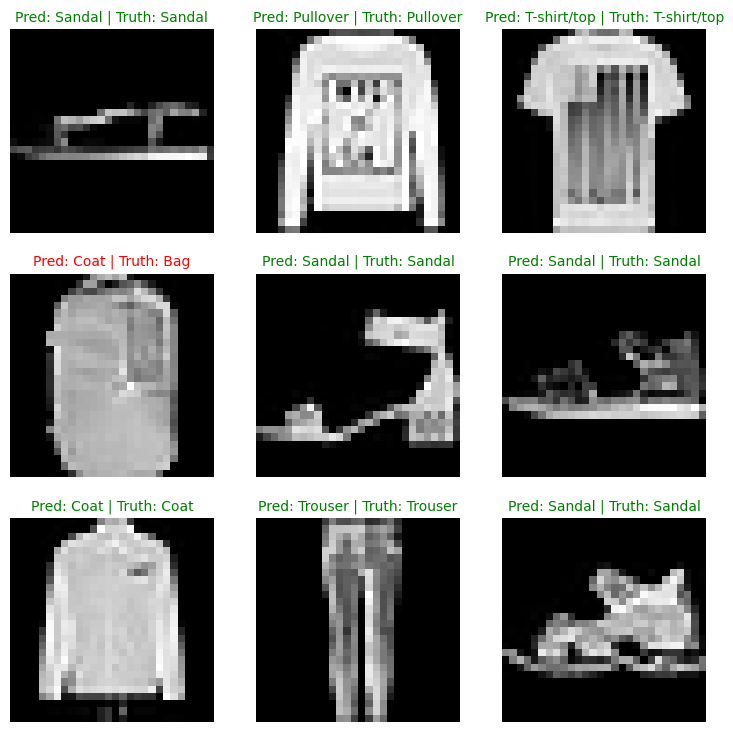

In [74]:
#plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    
    plt.imshow(sample.squeeze(),cmap = 'gray')
    
    pred_label = class_names[pred_classes[i]]
    
    truth_label = class_names[test_labels[i]]
    
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    if pred_label == truth_label:
        plt.title(title_text,fontsize=10, c='g') # for correct prediction
    else:
        plt.title(title_text,fontsize=10, c='r')
        
    plt.axis(False)

In [75]:
# make confusion matrix
!pip install mlxtend

In [76]:
from tqdm.auto import tqdm

# make predictiosn
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader,desc="Making predictions"):
    
        X,y = X.to(device), y.to(device)

        y_logits = model_2(X)

        y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())
    
    
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10] 

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [77]:
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 2])

In [78]:
len(y_pred_tensor)

10000

In [79]:
import torchmetrics,mlxtend

In [80]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

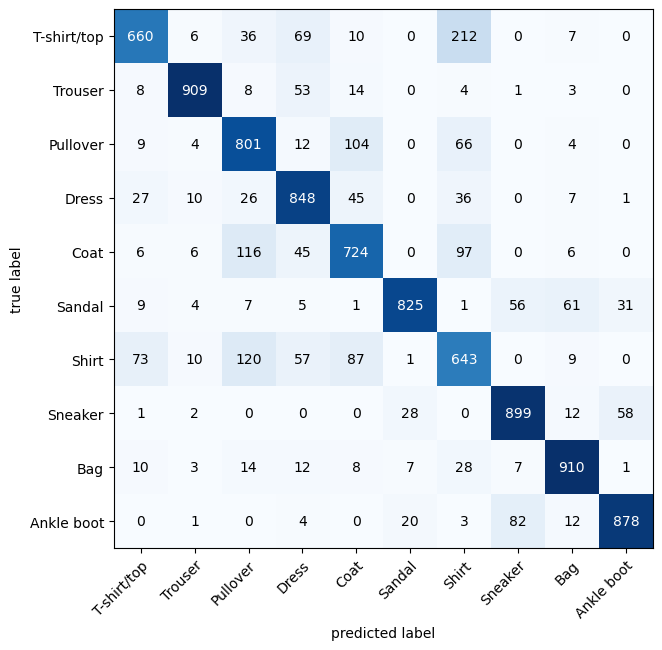

In [81]:
confmat = ConfusionMatrix(task='multiclass',num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                        target=test_data.targets)

fig, ax = plot_confusion_matrix(
        conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize = (10,7))

In [82]:
# SAve and load best model
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents =True,exist_ok=True)

model_name = "03_pytorch_computer_vision_model_2.pth"
model_save_path = model_path / model_name

#save model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_2.state_dict(),
          f=model_save_path)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [83]:
# new instance
torch.manual_seed(42)

loaded_model_2 = FashionModelV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_names))

# load in state_dict()
loaded_model_2.load_state_dict(torch.load(f=model_save_path))

loaded_model_2.to(device)

FashionModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [84]:
model_2_results

{'model_name': 'FashionModelV2',
 'model_loss': 0.3194074332714081,
 'model_acc': 88.29872204472844}

In [85]:
#Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                   data_loader=test_dataloader,loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionModelV2',
 'model_loss': 0.3194074332714081,
 'model_acc': 88.29872204472844}

In [86]:
torch.isclose(torch.tensor(model_2_results['model_loss']),
             torch.tensor(loaded_model_2_results['model_loss']))

tensor(True)